# 作业: 逻辑回归

## 作业要求：

用numpy实现Logistic Regression类（补充cell 1中定义的LogisticRegression类），用梯度下降法训练

1. 包括类的方法 loss = fit(X,Y) 函数，用于训练；输入：X为N * d维的训练数据，N为训练样本数，d为数据的维数；Y为N*1维的训练数据真实类别号；输出：loss为列表，包括每轮的损失函数值。

2. 包括类的方法 y_pred, y_pred_label = predict(X) 函数，用于测试；输入： X为N * d维的测试数据， N为测试样本数；输出：y_pred维数为N * 1，为模型的预测（回归）值；y_pred_label维数为N * 1，为根据回归值得到的预测类别号

3. 补充plotDecisioinBoundary函数，使其能够使用等高线图(contour）绘制出Logistic Regression模型的分类面。

In [ ]:
import numpy as np

class LogisticRegression(object):
    def __init__(self, dim, learning_rate=0.01, max_iter=100, seed=None):
        np.random.seed(seed)
        self.lr = learning_rate
        self.max_iter = max_iter  # 定义学习率和训练轮数
        # 可在此处补充类的属性


    #01
        self.W = np.random.normal(0, 0.1, [dim+1,1])
    def loss(self, P,Y):
        return -np.mean(Y * np.log(P) + (1-Y) * np.log(1-P))
    def gradient(self, X,P,Y):
        return np.dot(X.T , (P - Y)) / X.shape[0]

    def fit(self,X,Y):
        # 请在此处补充类的方法：训练函数，返回每轮loss的列表


        #02
        loss = []
        X = np.hstack((X,np.ones((X.shape[0],1))))
        for i in range(self.max_iter):
            Y_p = self.predict(X)[0]
            loss.append(self.loss(Y_p, Y))
            self.W = self.W - self.lr * self.gradient(X , Y_p, Y)
        

        return loss
        
    def predict(self,X): 
        # 请在此处补充类的方法：测试函数，返回对应X的预测值和预测类别列表    


        #03
        if X.shape[1] != self.W.shape[0]: 
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        Y_pred = 1 / (1 + np.exp(-np.dot(X,self.W)))
        Y_pred_label = (Y_pred > 0.5).astype(int)


        return Y_pred, Y_pred_label


In [ ]:
import matplotlib.pyplot as plt


def plotData(X,Y):
    """
    使用红色+号表示正例，蓝色圆点表示负例，绘制数据集中正负例的分布情况
    """
    plt.figure()
    pos_idx = (Y==1);
    # size m,1
    pos_idx = pos_idx[:,0];
    # size m, 这时才可用来索引某[一]个维度
    neg_idx = (Y==0);
    neg_idx = neg_idx[:,0];

    plt.plot(X[pos_idx,0],X[pos_idx,1],'r+')
    plt.plot(X[neg_idx,0],X[neg_idx,1],'bo')
    
def plotDecisioinBoundary(X, Y, regr):    
    """
    在正负例分布图上进一步绘制出模型regr的分类界面
    """
    # 先绘制正负例分布情况
    plotData(X,Y)

    # 绘制等高线图，在水平和垂直方向均有50个点
    plot_num=50;
    plot_num_2D=plot_num**2;

    # 准备网格
    x_plot = np.linspace(start=X[:,0].min(),stop=X[:,0].max(),num=plot_num)
    y_plot = np.linspace(start=X[:,1].min(),stop=X[:,1].max(),num=plot_num)
    X_plot,Y_plot = np.meshgrid(x_plot,y_plot)

    # 请在此补充代码，计算regr模型在各个格点的预测概率，并构成一个形状和格点相同的P_matrix数组，绘制等高线图


    #04
    X_plot_points = np.c_[X_plot.ravel(),Y_plot.ravel()]
    P_matrix = regr.predict(X_plot_points)[0]
    P_matrix = P_matrix.reshape(X_plot.shape)
   
   
    # 补充代码结束
    plt.contour(X_plot,Y_plot,P_matrix,np.array([0.5]))
    
def test(y_pred, y_true):
    true = 0.
    for j in range(y_pred.shape[0]):
        if y_true[j] == y_pred[j]:
            true += 1
    acc = true/y_pred.shape[0]
    return acc

[[-1.12967052]
 [ 0.52586855]
 [-1.35378883]]


<ipython-input-1-009b3dd7d69a>:37: RuntimeWarning: divide by zero encountered in log
  p2 = np.log(1-self._Logistic(X)).T.dot(1-Y)


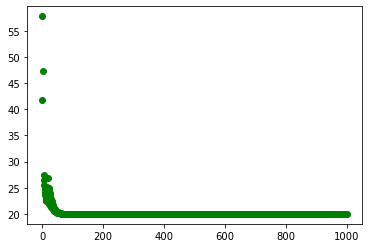

测试集上正确率:0.95


<Figure size 432x288 with 0 Axes>

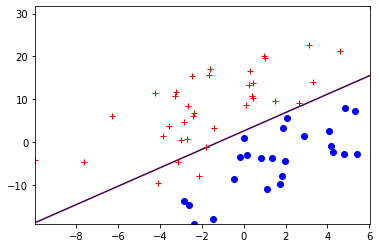

In [3]:
# 导入测试数据
seed = 210404
data_1 = np.load('data_for_logistic_regression_1.npz')
x_train = data_1['x_train']
y_train = data_1['y_train']
x_test = data_1['x_test']
y_test = data_1['y_test']
dim = x_train.shape[1]

# 训练逻辑回归模型
regr = LogisticRegression(dim, learning_rate=0.01, max_iter=1000, seed=seed)
loss = regr.fit(x_train, y_train)
print(regr.W)
# 打印损失
plt.figure()
plt.scatter(np.arange(len(loss)), loss, marker='o', c='green')
plt.show()

# 显示测试集中的分类界面
plt.figure()
plotDecisioinBoundary(x_test,y_test, regr)

y_pred,y_pred_label = regr.predict(x_test)
acc = test(y_pred_label, y_test)
print('测试集上正确率:{}'.format(acc))